# Introduction

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/gasturbine-co-and-nox-emission-data/gt_full.csv


In [3]:
df = pd.read_csv('/kaggle/input/gasturbine-co-and-nox-emission-data/gt_full.csv', index_col=0)
df.reset_index(inplace=True, drop = True)

# Exploratory Data Analysis

<h2>Columns</h2>

<ul>
<li>AT: Ambient temperature (°C)</li>
<li>AP: Ambient pressure (mbar)</li>
<li>AH: Ambient humidity (%)</li>
<li>AFDP: Air filter dp (mbar)</li>
<li>GTEP: Gas turbine exhaust pressure (mbar)</li> 
<li>TIT: Turbine inlet temperature (C)</li>
<li>TAT: Turbine after temperature (C)</li>
<li>TEY: Turbine energy yield (MWH)</li>
<li>CDP: Compressor discharge pressure (mbar)</li>
<li>CO: Carbon monoxide (mg/m3)</li>
<li>NOx: Nitrogen oxides (mg/m3)</li>
</ul>

In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [5]:
new_names = {
    'AT': 'air_temp',
    'AP': 'air_press',
    'AH': 'air_hum',
    'AFDP': 'air_filt_dp',
    'CDP': 'comp_out_press',
    'TIT': 'turb_in_temp',
    'TAT': 'turb_out_temp',
    'GTEP': 'turb_out_press',
    'TEY': 'turb_energy',
    'NOX': 'NOx'
}


df.rename(columns = new_names, inplace = True)

In [6]:
df.describe().round(2)

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,CO,NOx
count,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00,36733.00
mean,17.71,1013.07,77.87,3.93,25.56,1081.43,546.16,133.51,12.06,2.37,65.29
std,7.45,6.46,14.46,0.77,4.20,17.54,6.84,15.62,1.09,2.26,11.68
min,-6.23,985.85,24.08,2.09,17.70,1000.80,511.04,100.02,9.85,0.00,25.90
25%,11.78,1008.80,68.19,3.36,23.13,1071.80,544.72,124.45,11.44,1.18,57.16
50%,17.80,1012.60,80.47,3.94,25.10,1085.90,549.88,133.73,11.96,1.71,63.85
75%,23.66,1017.00,89.38,4.38,29.06,1097.00,550.04,144.08,12.86,2.84,71.55
max,37.10,1036.60,100.20,7.61,40.72,1100.90,550.61,179.50,15.16,44.10,119.91


In [7]:
df.columns

Index(['air_temp', 'air_press', 'air_hum', 'air_filt_dp', 'turb_out_press',
       'turb_in_temp', 'turb_out_temp', 'turb_energy', 'comp_out_press', 'CO',
       'NOx'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_temp        36733 non-null  float64
 1   air_press       36733 non-null  float64
 2   air_hum         36733 non-null  float64
 3   air_filt_dp     36733 non-null  float64
 4   turb_out_press  36733 non-null  float64
 5   turb_in_temp    36733 non-null  float64
 6   turb_out_temp   36733 non-null  float64
 7   turb_energy     36733 non-null  float64
 8   comp_out_press  36733 non-null  float64
 9   CO              36733 non-null  float64
 10  NOx             36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


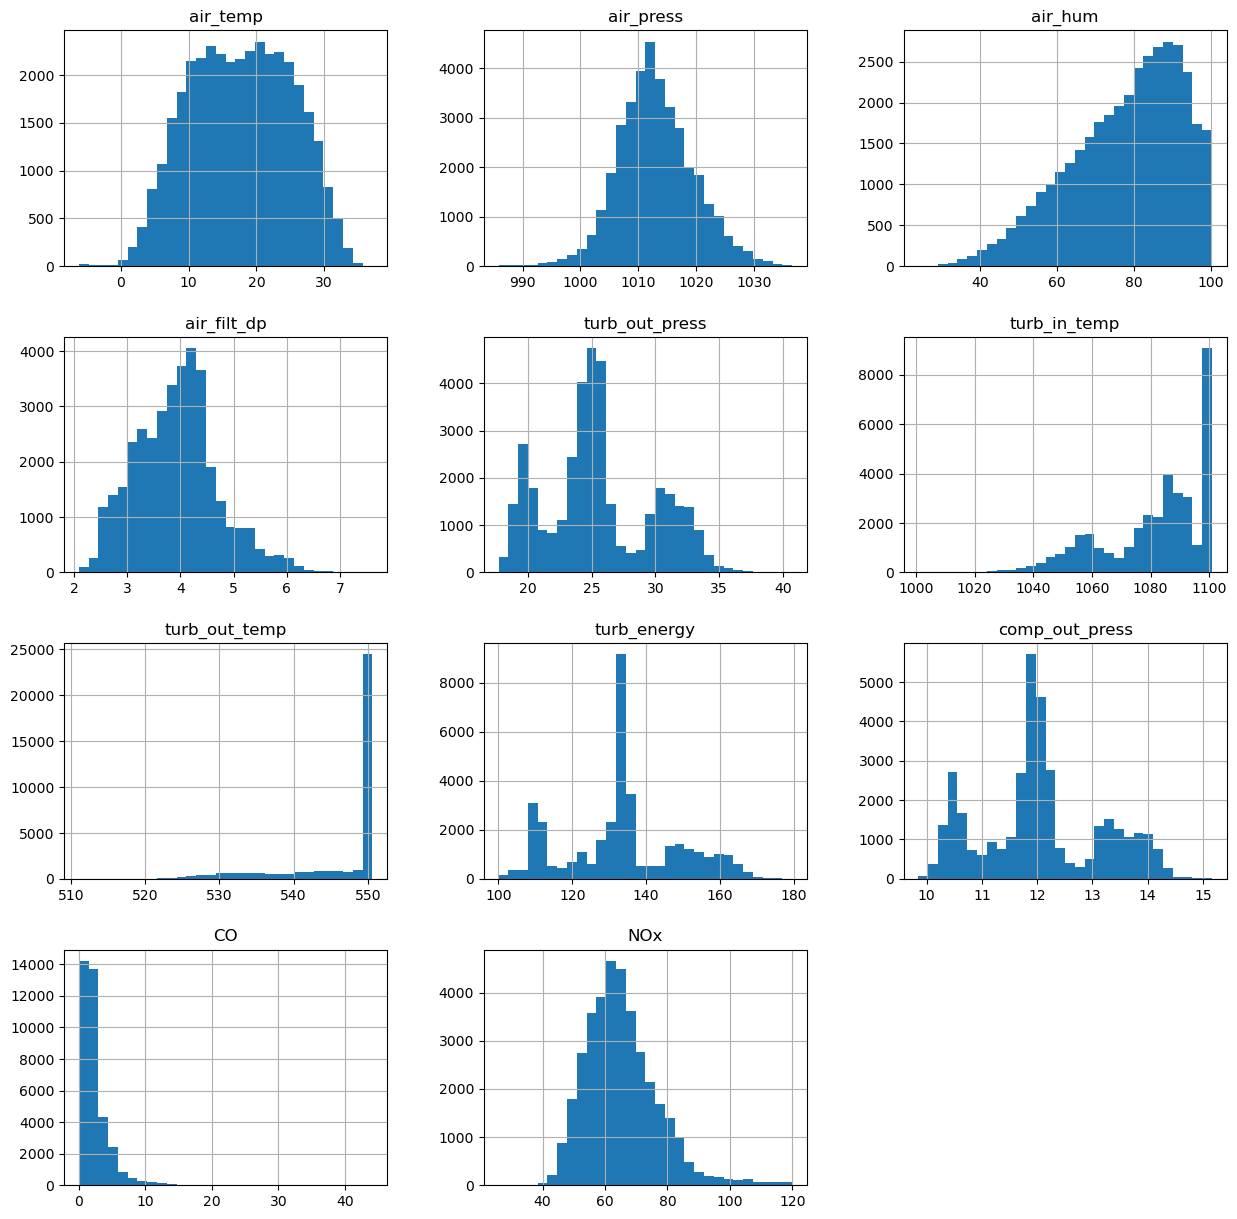

In [9]:
df.hist(bins = 30, figsize = (15,15))
plt.show()

In [10]:
df.corr()[['CO', 'NOx']].drop(['CO', 'NOx']).round(3)

,CO,NOx
air_temp,-0.174,-0.558
air_press,0.067,0.192
air_hum,0.107,0.165
air_filt_dp,-0.448,-0.188
turb_out_press,-0.519,-0.202
turb_in_temp,-0.706,-0.214
turb_out_temp,0.058,-0.093
turb_energy,-0.570,-0.116
comp_out_press,-0.551,-0.171


All features presents correlations statistically significantly different from zero (P < 10^(−6)). So, all features can be used in regression model.

<AxesSubplot:>

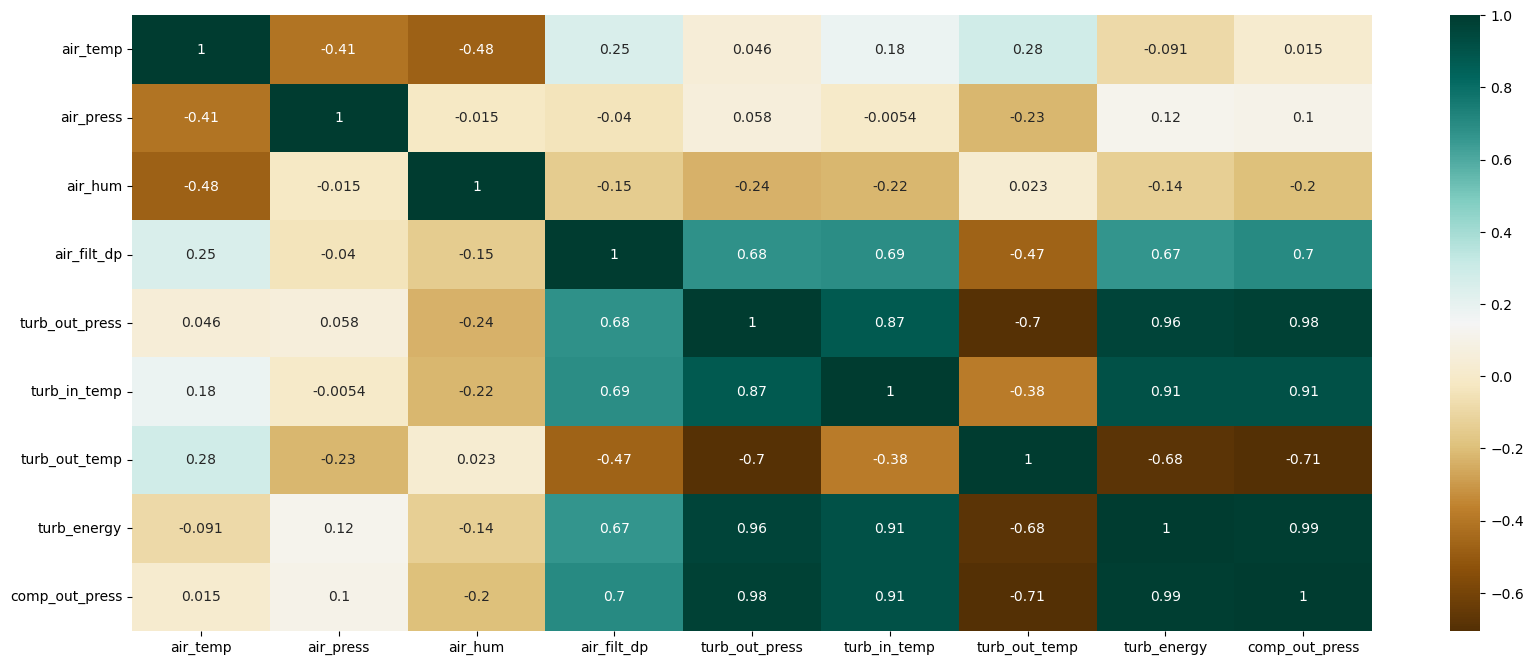

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(df[['air_temp', 'air_press', 'air_hum', 'air_filt_dp', 'turb_out_press',
       'turb_in_temp', 'turb_out_temp', 'turb_energy', 'comp_out_press']].corr(), annot=True, cmap='BrBG')

### It can be noted that the dependent variables that have a strong correlation with the target variables also exhibit a strong degree of correlation among themselves.
### Therefore, the application of a numerical method for extracting relevant features becomes necessary. In this case, CCA was chosen.

# Prediction

## Carbon Emission

In [12]:
COe = df.drop(['NOx'], axis = 1)

In [13]:
COe

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [14]:
X = COe.drop(['CO'], axis = 1)
y = COe[['CO']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² = ", r2)
print("MAE = ", mae)

R² =  0.5215508029360763
MAE =  0.8659378606081987


Text(0, 0.5, 'Valores Previstos Pelo Modelo')

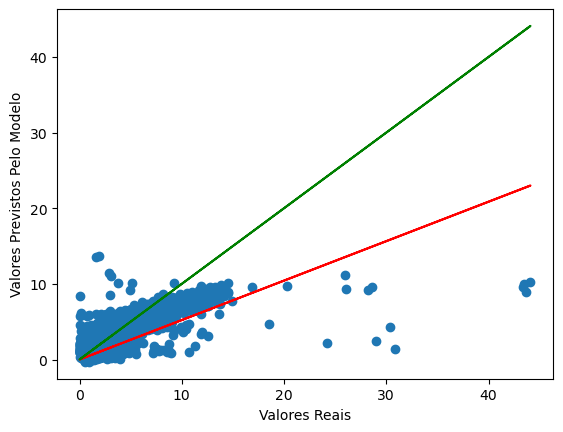

In [18]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, [r2*i for i in y_test.values], color = 'red')
plt.plot(y_test, y_test, 'green')

plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos Pelo Modelo")

## NOx Emission

In [19]:
NOxe = df.drop(['CO'], axis = 1)

In [20]:
NOxe

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,NOx
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [21]:
X = COe.drop(['CO'], axis = 1)
y = COe[['CO']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² = ", r2)
print("MAE = ", mae)

R² =  0.5549885125122138
MAE =  0.8552933585015323


Text(0, 0.5, 'Valores Previstos Pelo Modelo')

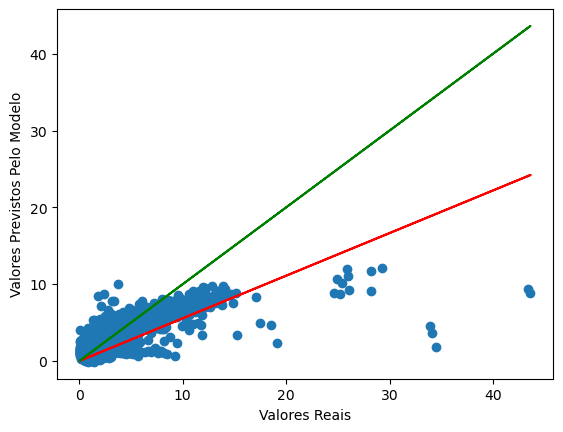

In [25]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, [r2*i for i in y_test.values], color = 'red')
plt.plot(y_test, y_test, 'green')

plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos Pelo Modelo")